In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [115]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
...                   random_state=0)

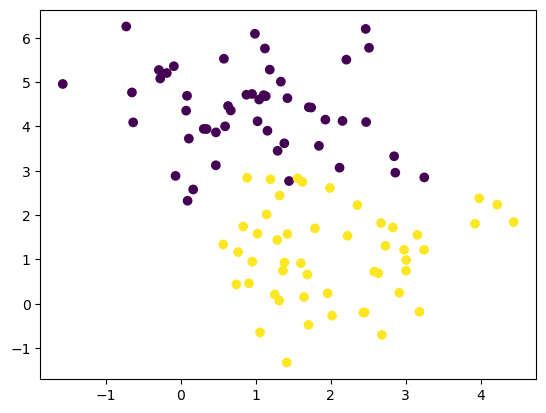

In [116]:
plt.scatter(X[:,0],X[:,1],c = y)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [118]:
X.shape,y.shape
# x - (1,3) y - (1,1) theta - (3,1) ans - (3,1) 

((100, 2), (100,))

# Perceptron Custom Implementation

In [119]:
class Perceptron:
    def __init__(self,max_iters = 100):
        self.max_iters = max_iters
    def fit(self,X,y):
        self._X = np.hstack([X,np.ones([X.shape[0],1])])
        y_mod = np.copy(y.reshape(-1,1))
        y_mod[y_mod == 0] = -1
        self._y = y_mod
        self.theta = np.vstack([np.zeros([X.shape[1],1]),1]) 
        for i in range(self.max_iters):
            m=0
            for x_point,y_point in zip(self._X,self._y):
                if np.dot(y_point,np.dot(self.theta.T,x_point))<0:
                    self.theta += np.dot(x_point.reshape(3,1),y_point.reshape(1, 1))
                    m+=1
            if m==0:
                break
            
    def predict_point(self,X):
        X = np.hstack([X, 1])
        prediction = np.dot(self.theta.T, X)
        return 0 if prediction < 0 else 1
        
    def predict(self,X):
        results = []
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results)
    def score(self,X,y):
        return sum(self.predict(X)==y)/len(y)
    

In [120]:
model = Perceptron()
model.fit(X_train,y_train)

In [121]:
model.predict(X_test[:])

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [122]:
model.score(X_test,y_test)

0.9090909090909091

In [123]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

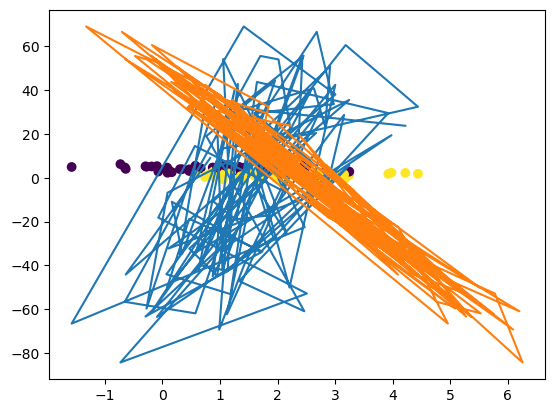

In [139]:
y_new = model.theta[0]*X[:,0] + model.theta[1]*X[:,1] + model.theta[-1]
# y_new
plt.scatter(X[:,0],X[:,1],c = y)
plt.plot(X,y_new)